# Eliminación de Nodos en Árboles Rojo-Negro

La eliminación de nodos en un árbol Rojo-Negro es una operación compleja debido a la necesidad de mantener las propiedades que equilibran el árbol. Cuando se elimina un nodo, el árbol puede necesitar una serie de rotaciones y recoloreados para restaurar sus propiedades de balance. La eliminación generalmente implica tres casos principales, dependiendo de la cantidad de hijos que tiene el nodo a eliminar:

1. **Nodo hoja (sin hijos):** Se elimina directamente, posiblemente requiriendo ajustes para mantener el árbol balanceado.
2. **Nodo con un solo hijo:** Se elimina el nodo y se reemplaza con su único hijo, con ajustes posteriores necesarios para el balance.
3. **Nodo con dos hijos:** Se busca el sucesor inorden (el nodo más pequeño en el subárbol derecho) o el predecesor inorden (el nodo más grande en el subárbol izquierdo), se sustituye el valor del nodo a eliminar por el valor del sucesor (o predecesor), y luego se elimina el sucesor (o predecesor), que tendrá a lo sumo un hijo.

## Implementación en Python

Aquí te muestro cómo implementar esta funcionalidad extendiendo la clase [`RBTree`](src/RBTree.py): 

In [66]:
# Código utilitario
from src.visualization import visualize_rbtree
# ver src/RBTree.py
from src.RBTree import RBTree

- `delete`: Elimina un nodo con un dato específico del árbol. Busca el nodo a eliminar, lo reemplaza con su sucesor si es necesario, y luego llama a fix_delete para ajustar el árbol y mantener sus propiedades.

In [67]:
def delete(self, data):
    print(f"[Trace] Intentando eliminar el nodo con valor: {data}")
    # Encontrar el nodo a eliminar
    node_to_delete = self.find_node(self.root, data)
    # Verificar si se encontró el nodo
    if node_to_delete == self.NIL:
        print("[Trace] Nodo no encontrado.")
        return  # Nodo no encontrado

    print(f"[Trace] Nodo encontrado: {node_to_delete.data}, procediendo a eliminar.")
    # Guardar referencia al nodo original y su color
    original_node = node_to_delete
    original_color = original_node.color
    # Si el hijo izquierdo es NIL, usar el hijo derecho
    if node_to_delete.left == self.NIL:
        temp_node = node_to_delete.right
        self.transplant(node_to_delete, node_to_delete.right)
        print("[Trace] Transplante realizado con el hijo derecho.")
    # Si el hijo derecho es NIL, usar el hijo izquierdo
    elif node_to_delete.right == self.NIL:
        temp_node = node_to_delete.left
        self.transplant(node_to_delete, node_to_delete.left)
        print("[Trace] Transplante realizado con el hijo izquierdo.")
    # Si tiene ambos hijos
    else:
        # Encontrar el sucesor (mínimo en subárbol derecho)
        original_node = self.minimum(node_to_delete.right)
        original_color = original_node.color
        temp_node = original_node.right
        print(f"[Trace] Sucesor encontrado: {original_node.data}.")
        # Si el padre del sucesor es el nodo a eliminar
        if original_node.parent == node_to_delete:
            temp_node.parent = original_node
        else:
            # Reemplazar sucesor por su hijo derecho
            self.transplant(original_node, original_node.right)
            # Preparar para transplantar el sucesor
            original_node.right = node_to_delete.right
            original_node.right.parent = original_node
            print("[Trace] Transplante de sucesor realizado.")

        # Reemplazar nodo a eliminar por sucesor
        self.transplant(node_to_delete, original_node)
        original_node.left = node_to_delete.left
        original_node.left.parent = original_node
        original_node.color = node_to_delete.color
        print("[Trace] Nodo a eliminar reemplazado por su sucesor.")

    # Si el nodo original era negro, corregir propiedades RB
    if original_color == 'black':
        print("[Trace] Corrigiendo propiedades del árbol Rojo-Negro después de eliminar un nodo negro.")
        self.fix_delete(temp_node)

    print("[Trace] Eliminación completada.")

# Extender la clase RBTree
RBTree.delete = delete

- `fix_delete`: Corrige el árbol después de una eliminación. Si se eliminó un nodo negro, esto podría violar las propiedades del árbol rojo-negro, por lo que este método aplica rotaciones y recoloreos para restaurar el equilibrio.

In [68]:
def fix_delete(self, node):
    while node != self.root and node.color == 'black':
        print("[Trace] Iniciando corrección de eliminación.")
        if node == node.parent.left:
            sibling = node.parent.right
            if sibling.color == 'red':
                print("[Trace] El hermano es rojo.")
                sibling.color = 'black'
                node.parent.color = 'red'
                self.left_rotate(node.parent)
                sibling = node.parent.right

            if sibling.left.color == 'black' and sibling.right.color == 'black':
                print("[Trace] Ambos hijos del hermano son negros.")
                sibling.color = 'red'
                node = node.parent
            else:
                if sibling.right.color == 'black':
                    print("[Trace] Hijo derecho del hermano es negro.")
                    sibling.left.color = 'black'
                    sibling.color = 'red'
                    self.right_rotate(sibling)
                    sibling = node.parent.right

                print("[Trace] Corrección final en el lado izquierdo.")
                sibling.color = node.parent.color
                node.parent.color = 'black'
                sibling.right.color = 'black'
                self.left_rotate(node.parent)
                node = self.root
        else:
            # El mismo procedimiento aplicado al lado derecho
            sibling = node.parent.left
            if sibling.color == 'red':
                print("[Trace] El hermano es rojo.")
                sibling.color = 'black'
                node.parent.color = 'red'
                self.right_rotate(node.parent)
                sibling = node.parent.left

            if sibling.right.color == 'black' and sibling.left.color == 'black':
                print("[Trace] Ambos hijos del hermano son negros.")
                sibling.color = 'red'
                node = node.parent
            else:
                if sibling.left.color == 'black':
                    print("[Trace] Hijo izquierdo del hermano es negro.")
                    sibling.right.color = 'black'
                    sibling.color = 'red'
                    self.left_rotate(sibling)
                    sibling = node.parent.left

                print("[Trace] Corrección final en el lado derecho.")
                sibling.color = node.parent.color
                node.parent.color = 'black'
                sibling.left.color = 'black'
                self.right_rotate(node.parent)
                node = self.root

    node.color = 'black'
    print("[Trace] Propiedades Rojo-Negro restauradas correctamente.")

# Extender la clase RBTree
RBTree.fix_delete = fix_delete

- `find_node`: Busca recursivamente y devuelve el nodo con el dato específico. Si el dato no está en el árbol, devuelve NIL.

In [69]:
def find_node(self, node, data):
    # Caso base: si encontramos un nodo NIL o los datos coinciden
    if node == self.NIL or node.data == data:
        return node
    # Subárbol izquierdo si los datos buscados son menores que los del nodo actual
    if data < node.data:
        return self.find_node(node.left, data)
    else:
        # Subárbol derecho si los datos buscados son mayores o iguales al nodo actual
        return self.find_node(node.right, data)

- `transplant`: Reemplaza un subárbol como hijo de su padre por otro subárbol, ayudando en las operaciones de eliminación.

In [70]:
def transplant(self, u, v):
    # Si el padre de u es None, entonces v se convierte en la nueva raíz
    if u.parent == None:
        self.root = v
    # U está en el lado izquierdo de su padre
    elif u == u.parent.left:
        u.parent.left = v
    else:
        # U está en el lado derecho de su padre
        u.parent.right = v
    # V hereda el padre de U
    v.parent = u.parent

- `minimum`: Encuentra y devuelve el nodo con el valor mínimo en el subárbol dado, utilizado para encontrar el sucesor durante la eliminación de un nodo.

In [71]:

def minimum(self, node):
    # Recorrer hacia el nodo más a la izquierda (el mínimo)
    while node.left != self.NIL:
        node = node.left
    return node

Este código ahora incluye la funcionalidad completa para la eliminación de nodos en un árbol rojo-negro, abordando todos los casos necesarios para mantener las propiedades del árbol después de la eliminación.
- La función **delete** maneja la búsqueda y eliminación del nodo.
- La función **fix_delete** se encarga de restaurar las propiedades del árbol rojo-negro después de la eliminación, asegurando que el árbol permanezca equilibrado.
Se han agregado también las funciones auxiliares:
- **find_node** para buscar un nodo por su valor, 
- **transplant** para reemplazar un nodo con otro, y 
- **minimum** para encontrar el nodo con el valor mínimo de un subárbol,
todas ellas necesarias para la operación de eliminación.

### Operaciones Clave en la Eliminación

- **Búsqueda del sucesor inorden o predecesor inorden:** Para encontrar un reemplazo adecuado cuando se elimina un nodo con dos hijos.
- **Rotaciones:** Para reequilibrar el árbol después de la eliminación.
- **Recoloreado:** Para restaurar las propiedades de color de los árboles Rojo-Negro después de la eliminación.

### Pasos para la Eliminación

1. **Encontrar el nodo a eliminar:** Utilizando la función de búsqueda, se localiza el nodo que contiene el valor a eliminar.
2. **Manejar el caso de dos hijos:** Si el nodo a eliminar tiene dos hijos, se busca su sucesor inorden (o predecesor), se copia el valor en el nodo a eliminar y luego se procede a eliminar el sucesor (que ahora se convierte en el "nodo a eliminar").
3. **Eliminar el nodo:** Dependiendo de si el nodo a eliminar es una hoja o tiene un solo hijo, se elimina el nodo y se conecta su hijo (si lo tiene) con el padre del nodo eliminado.
4. **Restaurar las propiedades Rojo-Negro:** Se realizan operaciones de recoloreado y rotación según sea necesario para mantener el árbol balanceado.


## Pruebas de Eliminación en Árboles Rojo-Negro

Para probar la funcionalidad de eliminación, se pueden insertar varios valores en el árbol, eliminar uno o varios nodos y luego verificar si el árbol aún cumple con las propiedades de los árboles Rojo-Negro.

#### 1. Preparación del Árbol para Pruebas

Primero, insertaremos varios nodos en el árbol Rojo-Negro para crear un árbol significativo sobre el cual realizar pruebas. Elegiremos nodos de manera que tengamos una variedad de casos de eliminación, incluyendo:

-   Eliminar una hoja.
-   Eliminar un nodo con un solo hijo.
-   Eliminar un nodo con dos hijos.

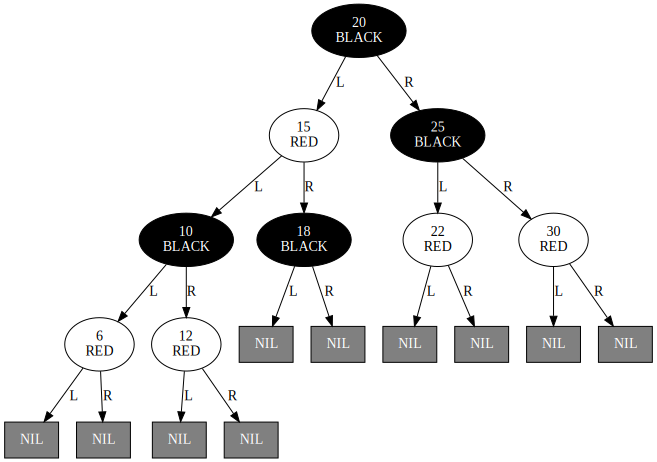

In [72]:
# Insertar nodos en el árbol
rb_tree = RBTree()
values_for_insertion = [20, 15, 25, 10, 18, 30, 22, 6, 12]
for value in values_for_insertion:
    rb_tree.insert(value)

# Visualizar el árbol
dot = visualize_rbtree (rb_tree)
display(dot)

#### 2. Ejecución de Pruebas de Eliminación

Ahora, eliminaremos algunos nodos específicos para cubrir diferentes casos de eliminación. Después de cada eliminación, podemos verificar manualmente o automatizar la verificación de las propiedades del árbol Rojo-Negro.

[Trace] Intentando eliminar el nodo con valor: 6
[Trace] Nodo encontrado: 6, procediendo a eliminar.
[Trace] Transplante realizado con el hijo derecho.
[Trace] Eliminación completada.


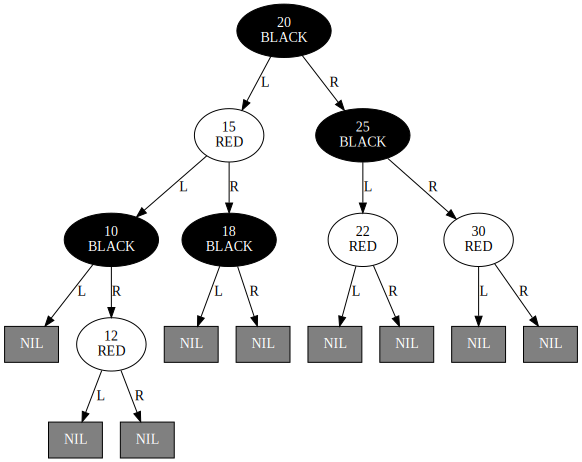

In [73]:
# Eliminar una hoja
rb_tree.delete(6)

# Visualizar el árbol
dot = visualize_rbtree (rb_tree)
display(dot)

[Trace] Intentando eliminar el nodo con valor: 18
[Trace] Nodo encontrado: 18, procediendo a eliminar.
[Trace] Transplante realizado con el hijo derecho.
[Trace] Corrigiendo propiedades del árbol Rojo-Negro después de eliminar un nodo negro.
[Trace] Iniciando corrección de eliminación.
[Trace] Hijo izquierdo del hermano es negro.
[Trace] Corrección final en el lado derecho.
[Trace] Propiedades Rojo-Negro restauradas correctamente.
[Trace] Eliminación completada.


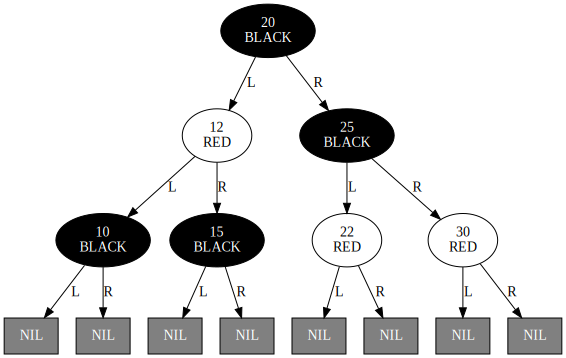

In [74]:
# Eliminar un nodo con un solo hijo
rb_tree.delete(18)

# Visualizar el árbol
dot = visualize_rbtree (rb_tree)
display(dot)

[Trace] Intentando eliminar el nodo con valor: 15
[Trace] Nodo encontrado: 15, procediendo a eliminar.
[Trace] Transplante realizado con el hijo derecho.
[Trace] Corrigiendo propiedades del árbol Rojo-Negro después de eliminar un nodo negro.
[Trace] Iniciando corrección de eliminación.
[Trace] Ambos hijos del hermano son negros.
[Trace] Propiedades Rojo-Negro restauradas correctamente.
[Trace] Eliminación completada.


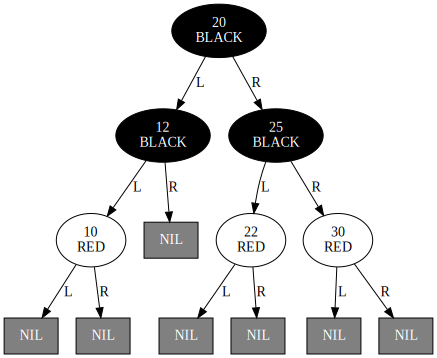

In [75]:
# Eliminar un nodo con dos hijos
rb_tree.delete(15)

# Visualizar el árbol
dot = visualize_rbtree (rb_tree)
display(dot)



## Complejidad

- **Complejidad de tiempo:** La eliminación en un árbol Rojo-Negro tiene una complejidad de tiempo promedio y en el peor de los casos de \(O(\log n)\), donde \(n\) es el número de nodos en el árbol.
- **Complejidad del espacio:** La operación de eliminación opera en espacio constante \(O(1)\), sin contar el espacio utilizado por las operaciones de recoloreado y rotación que son necesarias para mantener el balance del árbol.

## Ejercicios Prácticos

1. Implementa la función `_delete_node` considerando los tres casos principales de eliminación.
2. Añade las funciones de rotación y recoloreado necesarias para restaurar las propiedades de los árboles Rojo-Negro después de una eliminación.

La eliminación en árboles Rojo-Negro es un tema avanzado y requiere una comprensión profunda de las operaciones de rotación y recoloreado, así como de las propiedades que definen estos árboles. La implementación completa de la eliminación es extensa y varía según la estructura específica y las reglas de manejo de casos que se apliquen en el árbol.